In [1]:
###### Should be done on 05/08/2022

In [5]:
####### Import all necessity functions for machine learning ########
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as shc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, KMeansSMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report, silhouette_score

In [3]:
####### Import tensorflow ########
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 21 kB/s 
     |████████████████████████████████| 463 kB 7.7 MB/s 
     |████████████████████████████████| 1.3 MB 73.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab202207

In [6]:
####### Import all necessity functions for Deep Learning ########
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, BatchNormalization, Dropout
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.activations import relu, sigmoid, softmax, swish
from tensorflow.keras.losses import binary_crossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, MSE, MAE, huber
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from tensorflow.keras.regularizers import L1, L2, L1L2

In [6]:
####### Import the dataset ########
df = pd.read_csv('/content/ParisHousingClass.csv')
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [7]:
####### print number of row and columns ########
print("The # of rows are = ", df.shape[0],'\n')
print("The # of columns  = ", df.shape[1])

The # of rows are =  10000 

The # of columns  =  18


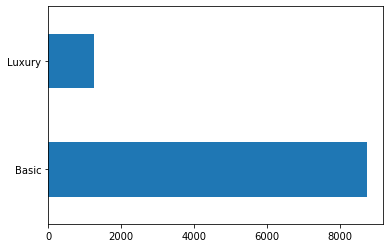

In [8]:
####### print the target column of this dataset ########
df.loc[:, 'category'].value_counts().plot(kind = 'barh')
####### Imbalaced Dataset #######

In [9]:
####### print the info of this dataset #######
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [10]:
####### Convert the target column into Label Encoding #######
df.loc[:, 'category'] = df.loc[:, 'category'].map({'Basic': 0, 'Luxury': 1})
print("Label encoding is done of category column.")

Label encoding is done of category column.


In [11]:
####### print the dataset #######
df.head(3)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0


In [12]:
####### print the descrobe of this dataset ########
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06,0.126500
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06,0.332429
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04,0.000000
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06,0.000000
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06,0.000000
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06,0.000000
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07,1.000000


In [13]:
####### Check missing value present in the dataset or not ########
if df.isnull().sum().sum() == 0:
  print("No NaN value in the dataset.")
else:
  print("NaN value present in the dataset")

No NaN value in the dataset.


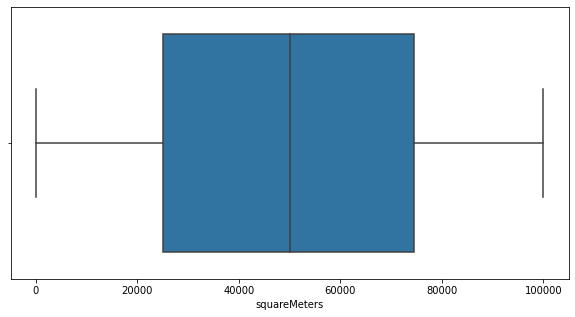

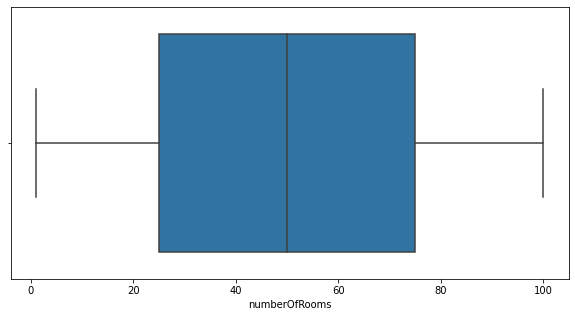

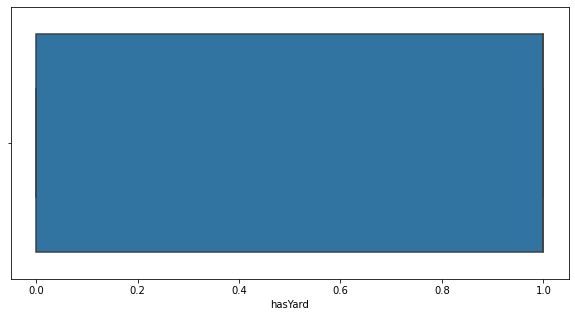

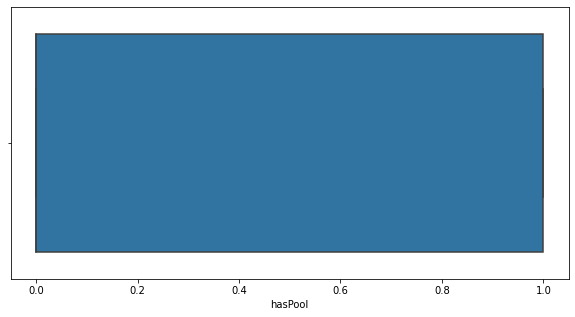

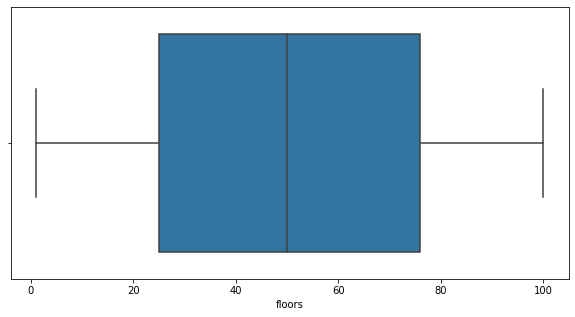

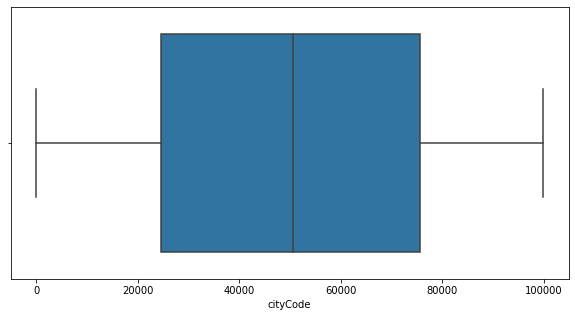

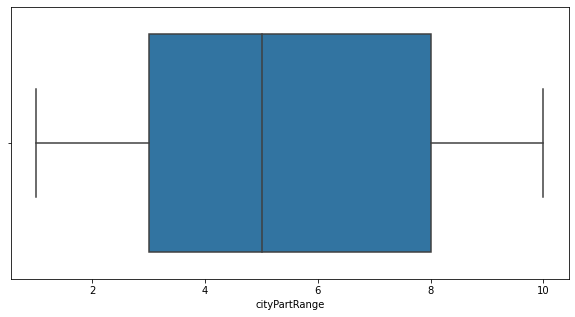

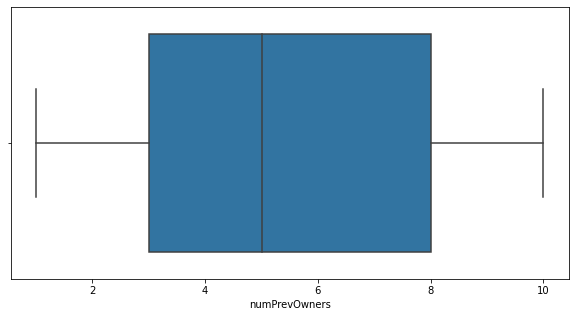

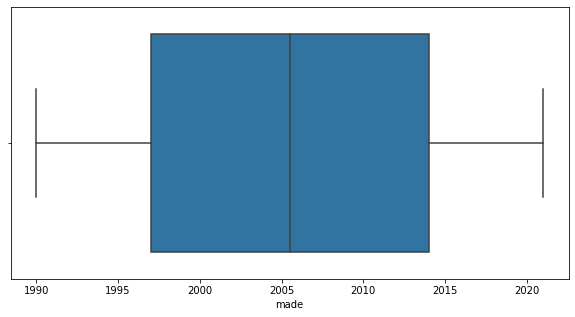

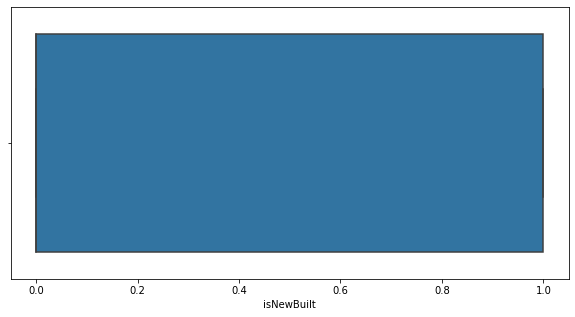

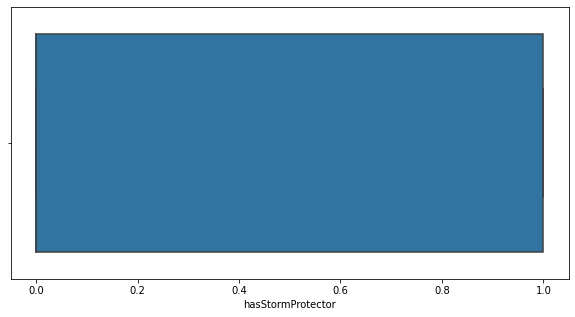

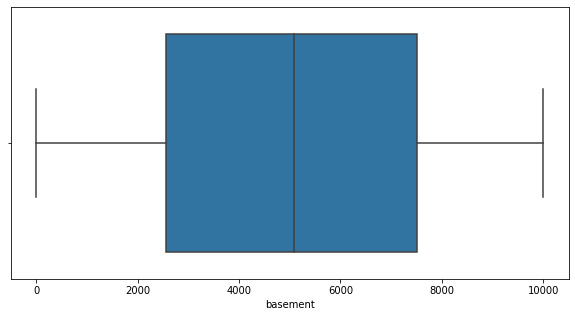

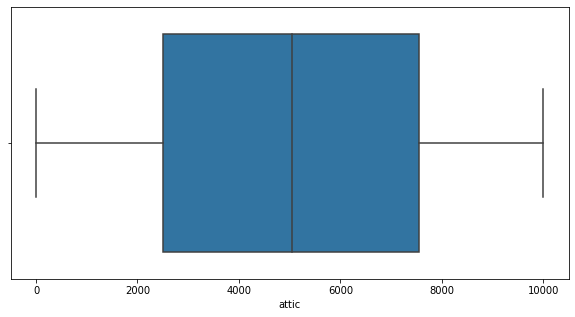

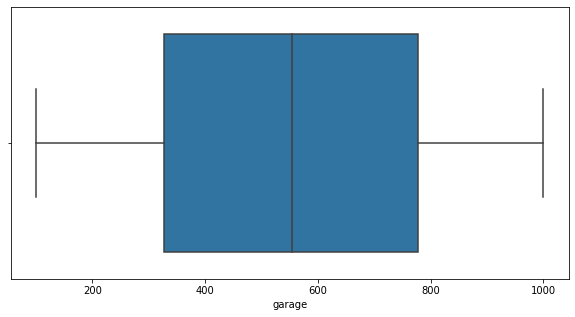

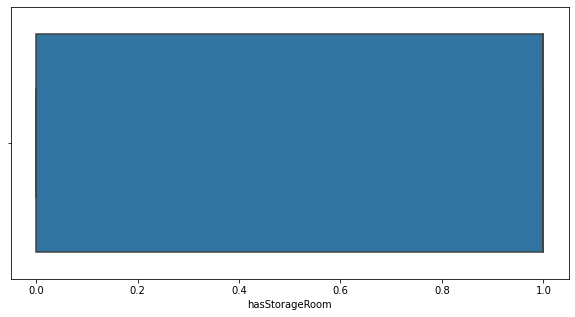

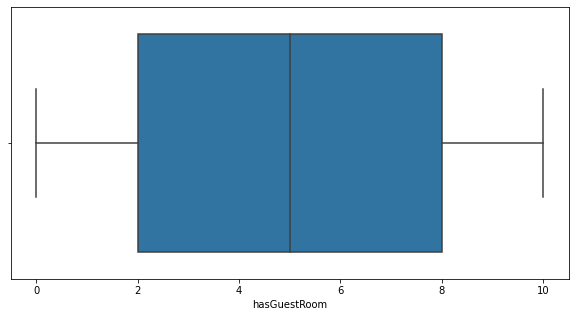

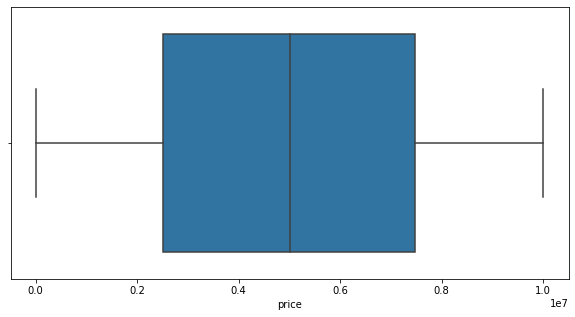

In [14]:
####### Check outlier present in this dataset or not #######
for columnName_ in df.columns[:-1]:
  plt.figure(figsize = (10, 5))
  sns.boxplot(data = df, x = df.loc[:, columnName_])

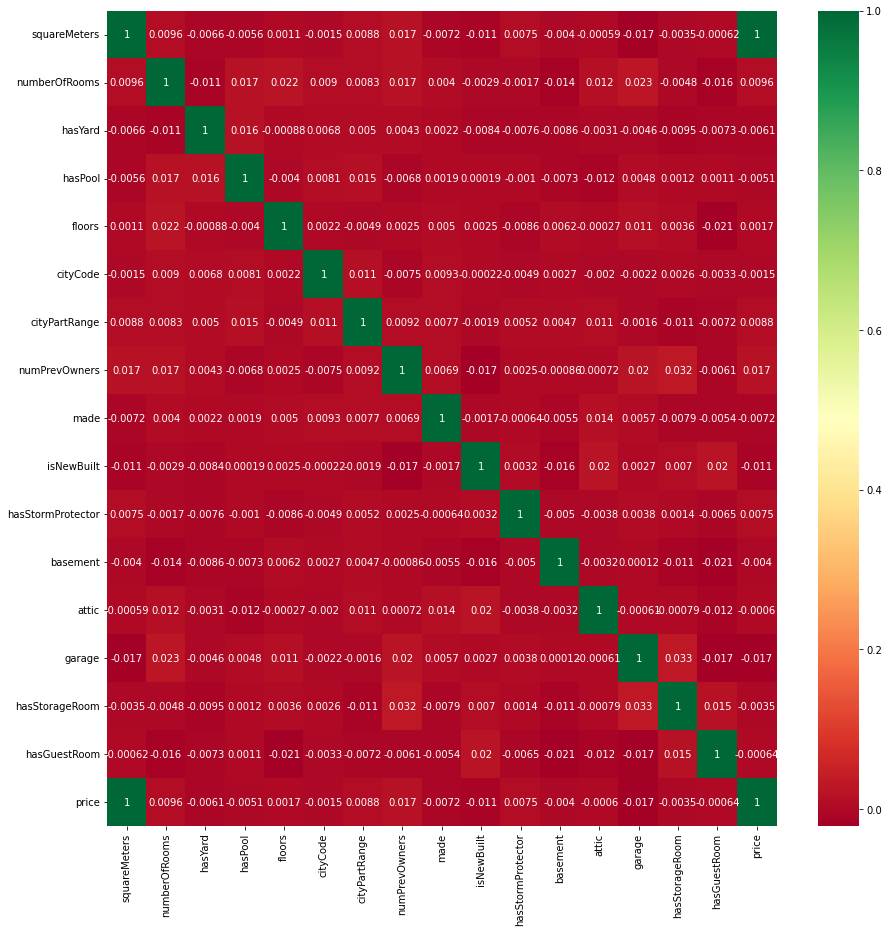

In [15]:
###### Check the correlation matrix ######
plt.figure(figsize = (15, 15))
sns.heatmap(df.iloc[:, :-1].corr(), annot = True, cmap='RdYlGn')

In [16]:
###### split the dataset into X and y #######
y = df.iloc[:, -1]
####### Delete this column ########
df.drop(['category'], axis = 1, inplace = True)
####### Scaling the dataset #######
standardScaler_ = StandardScaler()
X = standardScaler_.fit_transform(df.iloc[:])
print(f"X shape is = {X.shape} and y shape is {y.shape}")

X shape is = (10000, 17) and y shape is (10000,)


In [17]:
###### Split the dataset into train and test #######
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 17) (3000, 17) (7000,) (3000,)


Machine Learning Algorithm is used to train the model

In [18]:
####### Using Random Forest #######
randomForest_ = RandomForestClassifier()
randomForest_.fit(X_train, y_train)
predicted_ = randomForest_.predict(X_test)
print("accuracy is  = ", accuracy_score(predicted_, y_test))
print("precision is = ", precision_score(predicted_, y_test))
print("recall is    = ", recall_score(predicted_, y_test))
print("f1_score is  = ", f1_score(predicted_, y_test))

accuracy is  =  1.0
precision is =  1.0
recall is    =  1.0
f1_score is  =  1.0


In [19]:
###### Using XGBOOST #######
xgboost_ = XGBClassifier()
xgboost_.fit(X_train, y_train)
predicted_ = xgboost_.predict(X_test)
print("accuracy is  = ", accuracy_score(predicted_, y_test))
print("precision is = ", precision_score(predicted_, y_test))
print("recall is    = ", recall_score(predicted_, y_test))
print("f1_score is  = ", f1_score(predicted_, y_test))

accuracy is  =  1.0
precision is =  1.0
recall is    =  1.0
f1_score is  =  1.0


In [20]:
###### Gradient Boosting Classifier #######
gradientBoost_ = GradientBoostingClassifier()
gradientBoost_.fit(X_train, y_train)
predicted_ = gradientBoost_.predict(X_test)
print("accuracy is  = ", accuracy_score(predicted_, y_test))
print("precision is = ", precision_score(predicted_, y_test))
print("recall is    = ", recall_score(predicted_, y_test))
print("f1_score is  = ", f1_score(predicted_, y_test))

accuracy is  =  1.0
precision is =  1.0
recall is    =  1.0
f1_score is  =  1.0


Using Stratified Cross Validation

In [21]:
Kfold_ = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
count_, accuracy_, precision_, recall_, f1_score_ = 1, [], [], [], []
###### run the model ######
for train_index_, test_index_ in Kfold_.split(X, y):
  print(f"Cross validation # {count_} is running \n")
  X_train, X_test = X[train_index_], X[test_index_]
  y_train, y_test = y[train_index_], y[test_index_]
  ####### XGBOOST Classifier #######
  xgboost_ = XGBClassifier()
  xgboost_.fit(X_train, y_train)
  predicted_ = xgboost_.predict(X_test)
  accuracy_.append(accuracy_score(predicted_, y_test))
  precision_.append(precision_score(predicted_, y_test))
  recall_.append(recall_score(predicted_, y_test))
  f1_score_.append(f1_score(predicted_, y_test))
  ####### Increment by 1 in count_ #######
  count_ = count_ + 1

Cross validation # 1 is running 

Cross validation # 2 is running 

Cross validation # 3 is running 

Cross validation # 4 is running 

Cross validation # 5 is running 

Cross validation # 6 is running 

Cross validation # 7 is running 

Cross validation # 8 is running 

Cross validation # 9 is running 

Cross validation # 10 is running 



In [23]:
print("The accuracy score is  = ", np.array(accuracy_).mean(),'\n')
print("The precision score is = ", np.array(precision_).mean(), '\n')
print("The recall score is    = ", np.array(recall_).mean(), '\n')
print("The f1_score value is  = ", np.array(f1_score_).mean())

The accuracy score is  =  1.0 

The precision score is =  1.0 

The recall score is    =  1.0 

The f1_score value is  =  1.0


Using Neural Network to predict the model


In [26]:
from sklearn import metrics
from tensorflow.keras import optimizers
####### Create a sequntial model ########
model = Sequential()
####### Create first hidden layer with 128 neurons ########
model.add(Dense(units = 128, kernel_initializer = HeNormal(), activation = 'relu', input_dim = X.shape[1]))
####### Create second hidden layer with 32 neurons ########
model.add(Dense(units = 32, kernel_initializer = HeNormal(), activation = 'relu'))

###### Create an ouput layer #######
model.add(Dense(units = 1, activation = 'sigmoid'))

###### Compile the model and run it #######
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

###### fit the model and store in the history #######
history_ = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 32, verbose = 1)

Epoch 1/100
282/282 [==============================] - 3s 4ms/step - loss: 0.1298 - accuracy: 0.9529 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 2/100
282/282 [==============================] - 1s 3ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 3/100
282/282 [==============================] - 1s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 9.8725e-04 - val_accuracy: 1.0000
Epoch 4/100
282/282 [==============================] - 1s 3ms/step - loss: 5.7048e-04 - accuracy: 1.0000 - val_loss: 5.0438e-04 - val_accuracy: 1.0000
Epoch 5/100
282/282 [==============================] - 1s 3ms/step - loss: 3.1606e-04 - accuracy: 1.0000 - val_loss: 3.1935e-04 - val_accuracy: 1.0000
Epoch 6/100
282/282 [==============================] - 1s 3ms/step - loss: 1.9805e-04 - accuracy: 1.0000 - val_loss: 2.1169e-04 - val_accuracy: 1.0000
Epoch 7/100
282/282 [==============================] - 1s 3ms/step - loss: 1.3286e-04 - accuracy: 1.0000 - val_los

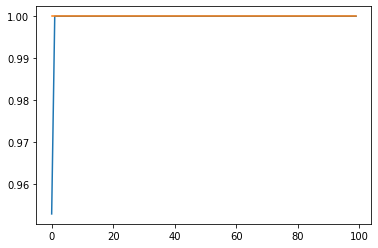

In [29]:
###### plot the val_accuracy and accuracy #######
plt.plot(history_.history['accuracy'], label = 'train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'test accuracy')
plt.show()

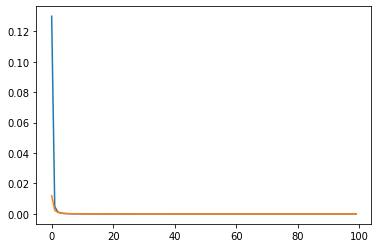

In [30]:
###### plot the val_loss and loss #######
plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.show()

Balanced the dataset ADASYN

In [32]:
ADASYN_ = ADASYN()
X, y = ADASYN_.fit_resample(X, y)
print(f"X shape is {X.shape} and y shape is {y.shape}")

X shape is (17524, 17) and y shape is (17524,)


In [33]:
###### Split the dataset into train and test #######
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12266, 17) (5258, 17) (12266,) (5258,)


In [34]:
from sklearn import metrics
from tensorflow.keras import optimizers
####### Create a sequntial model ########
model = Sequential()
####### Create first hidden layer with 128 neurons ########
model.add(Dense(units = 128, kernel_initializer = HeNormal(), activation = 'relu', input_dim = X.shape[1]))
####### Create second hidden layer with 32 neurons ########
model.add(Dense(units = 32, kernel_initializer = HeNormal(), activation = 'relu'))

###### Create an ouput layer #######
model.add(Dense(units = 1, activation = 'sigmoid'))

###### Compile the model and run it #######
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

###### fit the model and store in the history #######
history_ = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 32, verbose = 1)

Epoch 1/100
384/384 [==============================] - 2s 4ms/step - loss: 0.0961 - accuracy: 0.9641 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 2/100
384/384 [==============================] - 1s 4ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/100
384/384 [==============================] - 1s 4ms/step - loss: 5.2998e-04 - accuracy: 1.0000 - val_loss: 4.5128e-04 - val_accuracy: 1.0000
Epoch 4/100
384/384 [==============================] - 1s 3ms/step - loss: 2.3727e-04 - accuracy: 1.0000 - val_loss: 2.3983e-04 - val_accuracy: 1.0000
Epoch 5/100
384/384 [==============================] - 1s 3ms/step - loss: 1.2993e-04 - accuracy: 1.0000 - val_loss: 1.4441e-04 - val_accuracy: 1.0000
Epoch 6/100
384/384 [==============================] - 1s 3ms/step - loss: 7.9183e-05 - accuracy: 1.0000 - val_loss: 9.4289e-05 - val_accuracy: 1.0000
Epoch 7/100
384/384 [==============================] - 1s 3ms/step - loss: 5.1689e-05 - accuracy: 1.0000 - val

In [42]:
####### print all matrix ########
predicted_ = np.where(model.predict(X_test) > 0.5, 1, 0)
print("accuracy is  = ", accuracy_score(predicted_, y_test))
print("precision is = ", precision_score(predicted_, y_test))
print("recall is    = ", recall_score(predicted_, y_test))
print("f1_score is  = ", f1_score(predicted_, y_test))
print("\n\nClassification report is:\n")
print(classification_report(y_test, predicted_))
print("\nConfusion Matrix is:\n")
print(confusion_matrix(y_test, predicted_))

accuracy is  =  1.0
precision is =  1.0
recall is    =  1.0
f1_score is  =  1.0


Classification report is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2648
           1       1.00      1.00      1.00      2610

    accuracy                           1.00      5258
   macro avg       1.00      1.00      1.00      5258
weighted avg       1.00      1.00      1.00      5258


Confusion Matrix is:

[[2648    0]
 [   0 2610]]


In [222]:
####### import the dataset #######
df = pd.read_csv('/content/marketing_campaign.csv', sep = '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [223]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [224]:
df.loc[:, 'AcceptedCmp1'].value_counts()

0    2096
1     144
Name: AcceptedCmp1, dtype: int64

In [225]:
###### Delete ID, Year_Birth Dt_Customer ########
df.drop(['ID', 'Year_Birth', 'Dt_Customer'], axis = 1, inplace = True)
print("Dropped.")

Dropped.


In [226]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0


In [227]:
print("Total Number of column is = ", len(df.columns))

Total Number of column is =  26


In [228]:
df.loc[:, 'Education'] = df.loc[:, 'Education'].map({'PhD': 1, 'Master': 2, 'Graduation': 3, '2n Cycle': 4, 'Basic': 5})

In [229]:
df.loc[:, 'Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [230]:
df.shape

(2240, 26)

In [231]:
df = pd.get_dummies(df, columns = ['Marital_Status'], drop_first = True)
df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Z_CostContact,Z_Revenue,Response,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,3,58138.0,0,0,58,635,88,546,172,88,...,3,11,1,0,0,0,1,0,0,0
1,3,46344.0,1,1,38,11,1,6,2,1,...,3,11,0,0,0,0,1,0,0,0
2,3,71613.0,0,0,26,426,49,127,111,21,...,3,11,0,0,0,0,0,1,0,0
3,3,26646.0,1,0,26,11,4,20,10,3,...,3,11,0,0,0,0,0,1,0,0
4,1,58293.0,1,0,94,173,43,118,46,27,...,3,11,0,0,0,1,0,0,0,0


In [232]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis = 1, inplace = True)

In [233]:
df.loc[:, 'Income'].fillna(df.loc[:, 'Income'].mean(), inplace = True)

In [234]:
df.shape

(2240, 30)

In [235]:
from tensorflow.python.keras.constraints import MinMaxNorm
####### Scaling the dataset #######
standardScaler_ = MinMaxScaler()
X = standardScaler_.fit_transform(df)
new_df = pd.DataFrame(X, columns = df.columns)

In [236]:
new_df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.5,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.5,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.5,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.5,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [237]:
new_df.isnull().sum()

Education                  0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Response                   0
Marital_Status_Alone       0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Marital_Status_Together    0
Marital_Status_Widow       0
Marital_Status_YOLO        0
dtype: int64

In [238]:
###### PCA ######
PCA_ = PCA(n_components = 6)
X = PCA_.fit_transform(new_df)

In [239]:
np.cumsum(PCA_.explained_variance_ratio_)

array([0.18664349, 0.33048984, 0.4635534 , 0.54262776, 0.6142853 ,
       0.66830347])

KMeans Clustering Algorithm for Clustering

In [240]:
wcss_ = []
for n_cluster_ in range(2, 10):
  KMeans_ = KMeans(n_clusters = n_cluster_)
  KMeans_.fit_predict(X)
  print(n_cluster_, " ", silhouette_score(X, KMeans_.labels_))

2   0.30117481369911203
3   0.40763724635453674
4   0.454237306503177
5   0.4661704121318773
6   0.4191832216288199
7   0.38895900099692804
8   0.37077634845088137
9   0.3823718484821667


Agglomerative Clustering Used

In [241]:
for n_cluster_ in range(2, 10):
  KMeans_ = AgglomerativeClustering(n_clusters = n_cluster_)
  KMeans_.fit_predict(X)
  print(n_cluster_, " ", silhouette_score(X, KMeans_.labels_))

2   0.2738183138116271
3   0.38353216644193183
4   0.4211444452617301
5   0.4348693234219947
6   0.37562045124629795
7   0.38738835325211907
8   0.3545448286686118
9   0.3640602997571914


In [242]:
KMeans_ = AgglomerativeClustering(n_clusters = 5)
KMeans_.fit_predict(X)
KMeans_.labels_

array([1, 3, 2, ..., 4, 2, 0])

In [243]:
X = pd.DataFrame(X)
label = pd.DataFrame(KMeans_.labels_)
df = pd.concat([X, label], axis = 1)
df.head()

,0,1,2,3,4,5,0
0,-0.463558,1.064660,-0.418311,0.099991,-0.264728,-0.284927,1
1,-0.361222,-0.086297,-0.968683,-0.061658,-0.163676,0.161337,3
2,-0.622839,-0.137921,0.639271,-0.234661,-0.170892,-0.260720,2
3,-0.599166,-0.673177,0.238004,0.226583,-0.253752,-0.215854,2
4,0.704602,-0.192309,-0.005785,-0.136876,-0.083178,-0.046029,0


In [253]:
df.iloc[:, -1].value_counts()

0    789
2    580
3    374
1    252
4    245
Name: 0, dtype: int64

In [244]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [245]:
###### Split the dataset into train and test #######
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1568, 6) (672, 6) (1568,) (672,)


In [246]:
###### Using XGBOOST #######
xgboost_ = XGBClassifier()
xgboost_.fit(X_train, y_train)
predicted_ = xgboost_.predict(X_test)
print("accuracy is  = ", accuracy_score(predicted_, y_test))
print("precision is = ", precision_score(predicted_, y_test, average = 'micro'))
print("recall is    = ", recall_score(predicted_, y_test, average = 'micro'))
print("f1_score is  = ", f1_score(predicted_, y_test, average = 'micro'))

accuracy is  =  0.9940476190476191
precision is =  0.9940476190476191
recall is    =  0.9940476190476191
f1_score is  =  0.9940476190476191


In [254]:
from sklearn import metrics
from tensorflow.keras import optimizers
####### Create a sequntial model ########
model = Sequential()
####### Create first hidden layer with 128 neurons ########
model.add(Dense(units = 128, kernel_initializer = HeNormal(), activation = 'relu', input_dim = X.shape[1]))
####### Create second hidden layer with 32 neurons ########
model.add(Dense(units = 32, kernel_initializer = HeNormal(), activation = 'relu'))

###### Create an ouput layer #######
model.add(Dense(units = 5, activation = 'softmax'))

###### Compile the model and run it #######
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

###### fit the model and store in the history #######
history_ = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 32, verbose = 1)

Epoch 1/100
49/49 [==============================] - 1s 6ms/step - loss: 0.6369 - accuracy: 0.8960 - val_loss: 0.2159 - val_accuracy: 0.9747
Epoch 2/100
49/49 [==============================] - 0s 3ms/step - loss: 0.1227 - accuracy: 0.9885 - val_loss: 0.0791 - val_accuracy: 0.9940
Epoch 3/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0611 - accuracy: 0.9943 - val_loss: 0.0472 - val_accuracy: 0.9955
Epoch 4/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9949 - val_loss: 0.0324 - val_accuracy: 0.9985
Epoch 5/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9962 - val_loss: 0.0234 - val_accuracy: 0.9985
Epoch 6/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9962 - val_loss: 0.0187 - val_accuracy: 0.9985
Epoch 7/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9955 - val_loss: 0.0160 - val_accuracy: 0.9985
Epoch 8/100
4

Do this in an appropriate way

In [7]:
####### import the dataset #######
df = pd.read_csv('/content/marketing_campaign.csv', sep = '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
###### Delete the ID, Year_Birth, Dt_Customer column #######
df.drop(['ID', 'Year_Birth', 'Dt_Customer'], axis = 1, inplace = True)
###### print the dataset #######
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0


In [9]:
###### print the value_counts() in Education #######
df.loc[:, 'Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [10]:
###### Education column will be the Ordinal Encoding - meaning that rank wise ######
df.loc[:, 'Education'] = df.loc[:, 'Education'].map({'PhD': 1, 'Master': 2, 'Graduation': 3, '2n Cycle': 4, 'Basic': 5})
###### print the dataset ######
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,3,Single,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,3,Single,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,3,Together,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,3,Together,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,1,Married,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0


In [11]:
###### print the value_counts() of Marital_Status ######
df.loc[:, 'Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [12]:
###### print the columns ######
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [13]:
###### Marital_Status will be one Hot Encoding ######
df = pd.get_dummies(df, columns = ['Marital_Status'], drop_first = True)
###### print the dataset #######
df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Z_CostContact,Z_Revenue,Response,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,3,58138.0,0,0,58,635,88,546,172,88,...,3,11,1,0,0,0,1,0,0,0
1,3,46344.0,1,1,38,11,1,6,2,1,...,3,11,0,0,0,0,1,0,0,0
2,3,71613.0,0,0,26,426,49,127,111,21,...,3,11,0,0,0,0,0,1,0,0
3,3,26646.0,1,0,26,11,4,20,10,3,...,3,11,0,0,0,0,0,1,0,0
4,1,58293.0,1,0,94,173,43,118,46,27,...,3,11,0,0,0,1,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


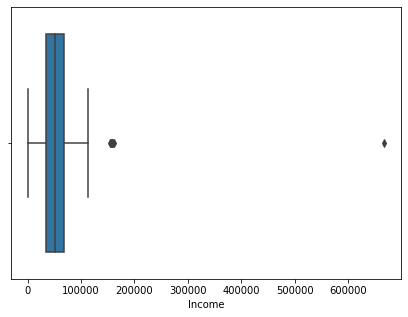

In [14]:
###### Check the outliers ######
plt.figure(figsize = (7, 5))
sns.boxplot(df.loc[:, 'Income'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


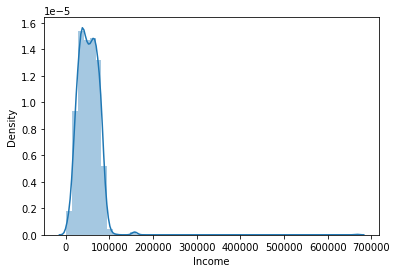

In [15]:
###### print the distribution of this Income column ######
sns.distplot(df.loc[:, 'Income'])

In [16]:
###### It's a left skew distribution so we will have to use IQR - Boxplot ######
percentile_75 = df.loc[:, 'Income'].quantile(0.75)
percentile_25 = df.loc[:, 'Income'].quantile(0.25)
####### Find the IQR #######
IQR_ = percentile_75 - percentile_25
###### Find the upper limit and lower limit #######
upper_limit_ = percentile_75 + 1.5*IQR_
lower_limit_ = percentile_25 - 1.5*IQR_
print(f"upper limit is = {upper_limit_} and lower limit is = {lower_limit_}")
###### Check how many outlier are present ######
print("Total number of outliers in Income feature = ", len((df.loc[:, 'Income'] > upper_limit_) | (df.loc[:, 'Income'] < lower_limit_)))
#### Capping the outliers
df.loc[:, 'Income'] = np.where(df.loc[:, 'Income'] > upper_limit_,
        upper_limit_,
        np.where(df.loc[:, 'Income'] < lower_limit_,
                 lower_limit_,
                 df.loc[:, 'Income']))
###### Capping is done #######

upper limit is = 118350.5 and lower limit is = -14525.5
Total number of outliers in Income feature =  2240


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


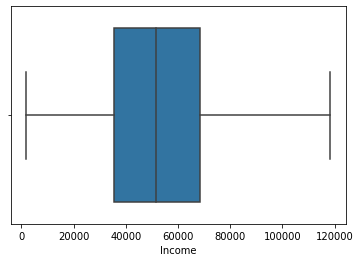

In [17]:
####### Check outlier is removed or not ######
sns.boxplot(df.loc[:, 'Income'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


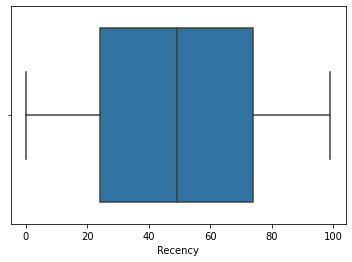

In [18]:
###### Check Recencey column for outliers ######
sns.boxplot(df.loc[:, 'Recency'])
###### No outliers ######

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


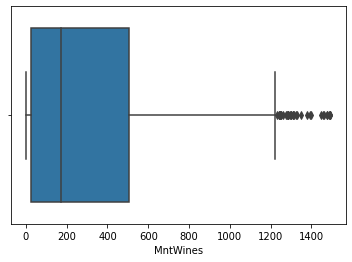

In [19]:
###### Check MntWines for outliers #######
sns.boxplot(df.loc[:, 'MntWines'])
###### There is outliers ######

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


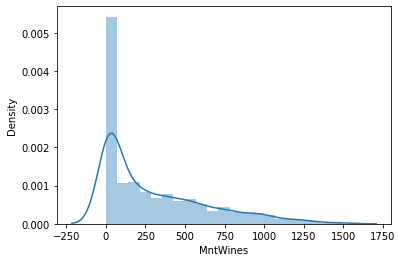

In [20]:
###### print the distplot ######
sns.distplot(df.loc[:, 'MntWines'])

In [21]:
###### It's a left skew distribution so we will have to use IQR - Boxplot ######
percentile_75 = df.loc[:, 'MntWines'].quantile(0.75)
percentile_25 = df.loc[:, 'MntWines'].quantile(0.25)
####### Find the IQR #######
IQR_ = percentile_75 - percentile_25
###### Find the upper limit and lower limit #######
upper_limit_ = percentile_75 + 1.5*IQR_
lower_limit_ = percentile_25 - 1.5*IQR_
print(f"upper limit is = {upper_limit_} and lower limit is = {lower_limit_}")
###### Check how many outlier are present ######
print("Total number of outliers in Income feature = ", len((df.loc[:, 'MntWines'] > upper_limit_) | (df.loc[:, 'MntWines'] < lower_limit_)))
#### Capping the outliers
df.loc[:, 'MntWines'] = np.where(df.loc[:, 'MntWines'] > upper_limit_,
        upper_limit_,
        np.where(df.loc[:, 'MntWines'] < lower_limit_,
                 lower_limit_,
                 df.loc[:, 'MntWines']))
###### Capping is done #######

upper limit is = 1225.0 and lower limit is = -697.0
Total number of outliers in Income feature =  2240


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


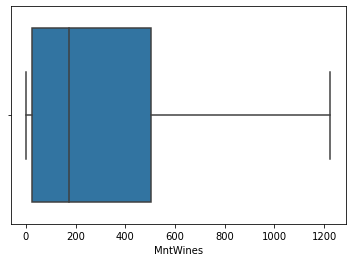

In [22]:
###### Check MntWines for outliers is removed or not #######
sns.boxplot(df.loc[:, 'MntWines'])
###### There is no outliers ######

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


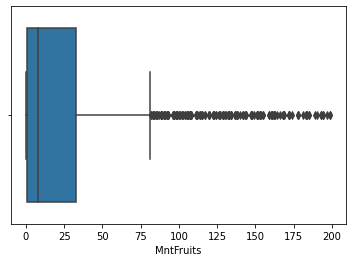

In [23]:
###### Check MntWines for outliers #######
sns.boxplot(df.loc[:, 'MntFruits'])
###### There is outliers ######

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


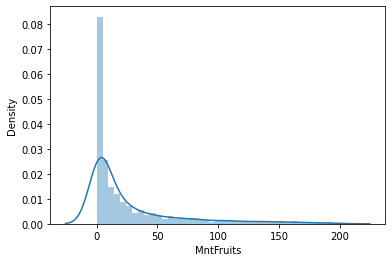

In [24]:
###### print the distplot ######
sns.distplot(df.loc[:, 'MntFruits'])

In [25]:
###### It's a left skew distribution so we will have to use IQR - Boxplot ######
percentile_75 = df.loc[:, 'MntFruits'].quantile(0.75)
percentile_25 = df.loc[:, 'MntFruits'].quantile(0.25)
####### Find the IQR #######
IQR_ = percentile_75 - percentile_25
###### Find the upper limit and lower limit #######
upper_limit_ = percentile_75 + 1.5*IQR_
lower_limit_ = percentile_25 - 1.5*IQR_
print(f"upper limit is = {upper_limit_} and lower limit is = {lower_limit_}")
###### Check how many outlier are present ######
print("Total number of outliers in Income feature = ", len((df.loc[:, 'MntFruits'] > upper_limit_) | (df.loc[:, 'MntFruits'] < lower_limit_)))
#### Capping the outliers
df.loc[:, 'MntFruits'] = np.where(df.loc[:, 'MntFruits'] > upper_limit_,
        upper_limit_,
        np.where(df.loc[:, 'MntFruits'] < lower_limit_,
                 lower_limit_,
                 df.loc[:, 'MntFruits']))
###### Capping is done #######

upper limit is = 81.0 and lower limit is = -47.0
Total number of outliers in Income feature =  2240


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


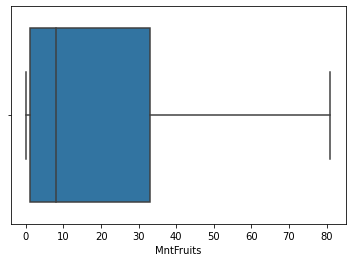

In [26]:
###### Check MntWines for outliers #######
sns.boxplot(df.loc[:, 'MntFruits'])
###### There is outliers ######

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


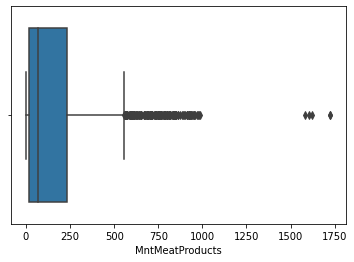

In [27]:
###### Check MntWines for outliers #######
sns.boxplot(df.loc[:, 'MntMeatProducts'])
###### There is outliers ######

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


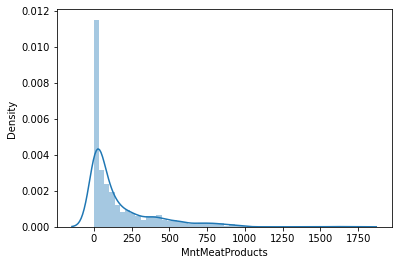

In [28]:
###### print the distplot ######
sns.distplot(df.loc[:, 'MntMeatProducts'])

In [29]:
###### It's a left skew distribution so we will have to use IQR - Boxplot ######
percentile_75 = df.loc[:, 'MntMeatProducts'].quantile(0.75)
percentile_25 = df.loc[:, 'MntMeatProducts'].quantile(0.25)
####### Find the IQR #######
IQR_ = percentile_75 - percentile_25
###### Find the upper limit and lower limit #######
upper_limit_ = percentile_75 + 1.5*IQR_
lower_limit_ = percentile_25 - 1.5*IQR_
print(f"upper limit is = {upper_limit_} and lower limit is = {lower_limit_}")
###### Check how many outlier are present ######
print("Total number of outliers in Income feature = ", len((df.loc[:, 'MntMeatProducts'] > upper_limit_) | (df.loc[:, 'MntMeatProducts'] < lower_limit_)))
#### Capping the outliers
df.loc[:, 'MntMeatProducts'] = np.where(df.loc[:, 'MntMeatProducts'] > upper_limit_,
        upper_limit_,
        np.where(df.loc[:, 'MntMeatProducts'] < lower_limit_,
                 lower_limit_,
                 df.loc[:, 'MntMeatProducts']))
###### Capping is done #######

upper limit is = 556.0 and lower limit is = -308.0
Total number of outliers in Income feature =  2240


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


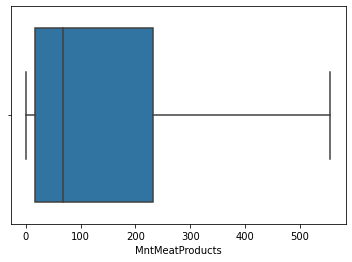

In [30]:
###### Check MntWines for outliers #######
sns.boxplot(df.loc[:, 'MntMeatProducts'])
###### There is outliers ######

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


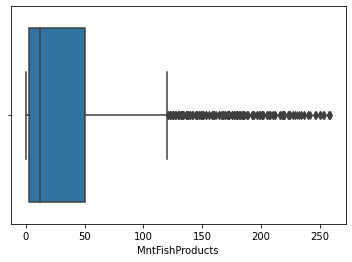

In [31]:
###### Check MntWines for outliers #######
sns.boxplot(df.loc[:, 'MntFishProducts'])
###### There is outliers ######

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


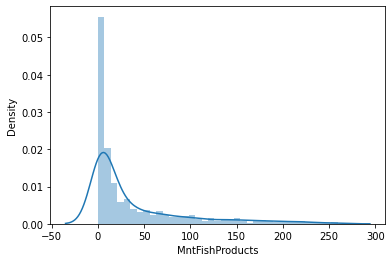

In [32]:
###### print the distplot ######
sns.distplot(df.loc[:, 'MntFishProducts'])

In [33]:
###### It's a left skew distribution so we will have to use IQR - Boxplot ######
percentile_75 = df.loc[:, 'MntFishProducts'].quantile(0.75)
percentile_25 = df.loc[:, 'MntFishProducts'].quantile(0.25)
####### Find the IQR #######
IQR_ = percentile_75 - percentile_25
###### Find the upper limit and lower limit #######
upper_limit_ = percentile_75 + 1.5*IQR_
lower_limit_ = percentile_25 - 1.5*IQR_
print(f"upper limit is = {upper_limit_} and lower limit is = {lower_limit_}")
###### Check how many outlier are present ######
print("Total number of outliers in Income feature = ", len((df.loc[:, 'MntFishProducts'] > upper_limit_) | (df.loc[:, 'MntFishProducts'] < lower_limit_)))
#### Capping the outliers
df.loc[:, 'MntFishProducts'] = np.where(df.loc[:, 'MntFishProducts'] > upper_limit_,
        upper_limit_,
        np.where(df.loc[:, 'MntFishProducts'] < lower_limit_,
                 lower_limit_,
                 df.loc[:, 'MntFishProducts']))
###### Capping is done #######

upper limit is = 120.5 and lower limit is = -67.5
Total number of outliers in Income feature =  2240


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


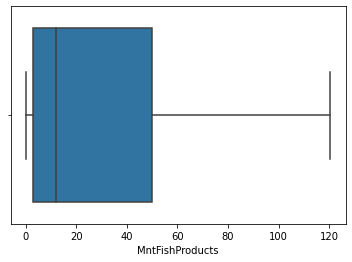

In [34]:
###### Check MntWines for outliers #######
sns.boxplot(df.loc[:, 'MntFishProducts'])
###### There is outliers ######

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


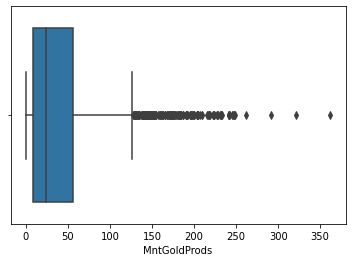

In [35]:
###### Check MntWines for outliers #######
sns.boxplot(df.loc[:, 'MntGoldProds'])
###### There is outliers ######

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


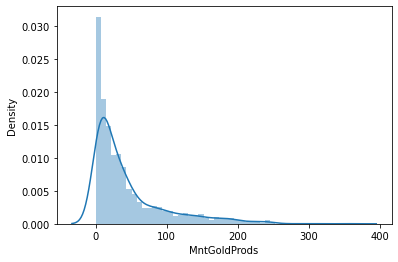

In [36]:
###### print the distplot ######
sns.distplot(df.loc[:, 'MntGoldProds'])

In [37]:
###### It's a left skew distribution so we will have to use IQR - Boxplot ######
percentile_75 = df.loc[:, 'MntGoldProds'].quantile(0.75)
percentile_25 = df.loc[:, 'MntGoldProds'].quantile(0.25)
####### Find the IQR #######
IQR_ = percentile_75 - percentile_25
###### Find the upper limit and lower limit #######
upper_limit_ = percentile_75 + 1.5*IQR_
lower_limit_ = percentile_25 - 1.5*IQR_
print(f"upper limit is = {upper_limit_} and lower limit is = {lower_limit_}")
###### Check how many outlier are present ######
print("Total number of outliers in Income feature = ", len((df.loc[:, 'MntGoldProds'] > upper_limit_) | (df.loc[:, 'MntGoldProds'] < lower_limit_)))
#### Capping the outliers
df.loc[:, 'MntGoldProds'] = np.where(df.loc[:, 'MntGoldProds'] > upper_limit_,
        upper_limit_,
        np.where(df.loc[:, 'MntGoldProds'] < lower_limit_,
                 lower_limit_,
                 df.loc[:, 'MntGoldProds']))
###### Capping is done #######

upper limit is = 126.5 and lower limit is = -61.5
Total number of outliers in Income feature =  2240


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


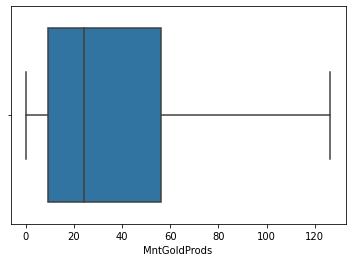

In [38]:
###### Check MntWines for outliers #######
sns.boxplot(df.loc[:, 'MntGoldProds'])
###### There is outliers ######

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


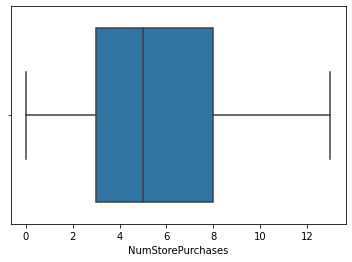

In [39]:
###### There is no outliers #######
sns.boxplot(df.loc[:, 'NumStorePurchases'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


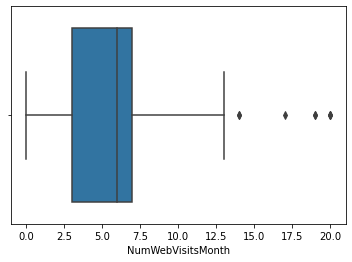

In [40]:
###### Check NumWebVisitsMonth outliers ######
sns.boxplot(df.loc[:, 'NumWebVisitsMonth'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


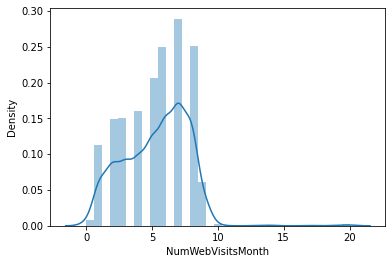

In [41]:
sns.distplot(df.loc[:, 'NumWebVisitsMonth'])

In [42]:
###### It's a left skew distribution so we will have to use IQR - Boxplot ######
percentile_75 = df.loc[:, 'NumWebVisitsMonth'].quantile(0.75)
percentile_25 = df.loc[:, 'NumWebVisitsMonth'].quantile(0.25)
####### Find the IQR #######
IQR_ = percentile_75 - percentile_25
###### Find the upper limit and lower limit #######
upper_limit_ = percentile_75 + 1.5*IQR_
lower_limit_ = percentile_25 - 1.5*IQR_
print(f"upper limit is = {upper_limit_} and lower limit is = {lower_limit_}")
###### Check how many outlier are present ######
print("Total number of outliers in Income feature = ", len((df.loc[:, 'NumWebVisitsMonth'] > upper_limit_) | (df.loc[:, 'NumWebVisitsMonth'] < lower_limit_)))
#### Capping the outliers
df.loc[:, 'NumWebVisitsMonth'] = np.where(df.loc[:, 'NumWebVisitsMonth'] > upper_limit_,
        upper_limit_,
        np.where(df.loc[:, 'NumWebVisitsMonth'] < lower_limit_,
                 lower_limit_,
                 df.loc[:, 'NumWebVisitsMonth']))
###### Capping is done #######

upper limit is = 13.0 and lower limit is = -3.0
Total number of outliers in Income feature =  2240


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


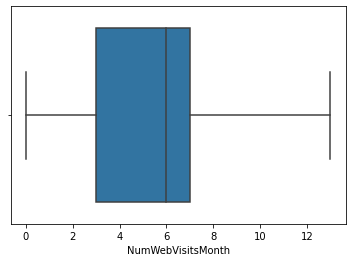

In [43]:
###### Check NumWebVisitsMonth outliers ######
sns.boxplot(df.loc[:, 'NumWebVisitsMonth'])

In [44]:
###### print the dataset ######
df.head(2)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Z_CostContact,Z_Revenue,Response,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,3,58138.0,0,0,58,635.0,81.0,546.0,120.5,88,...,3,11,1,0,0,0,1,0,0,0
1,3,46344.0,1,1,38,11.0,1.0,6.0,2.0,1,...,3,11,0,0,0,0,1,0,0,0


In [45]:
###### NaN value will be stored using mean() #######

In [46]:
df.loc[:, 'Income'].fillna(df.loc[:, 'Income'].mean(), inplace = True)

In [47]:
####### Scaling the dataset using MinMax Scaler ######
MinMaxScaler_ = MinMaxScaler()
new_df = MinMaxScaler_.fit_transform(df)
new_df = pd.DataFrame(new_df, columns = df.columns)
####### print the dataset #######
new_df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Z_CostContact,Z_Revenue,Response,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.5,0.483689,0.0,0.0,0.585859,0.518367,1.000000,0.982014,1.000000,0.334601,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.5,0.382557,0.5,0.5,0.383838,0.008980,0.012346,0.010791,0.016598,0.003802,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.5,0.599234,0.0,0.0,0.262626,0.347755,0.604938,0.228417,0.921162,0.079848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.5,0.213650,0.5,0.0,0.262626,0.008980,0.049383,0.035971,0.082988,0.011407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.485018,0.5,0.0,0.949495,0.141224,0.530864,0.212230,0.381743,0.102662,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


KMeans Clustering Used to Cluster the dataset before Using PCA

In [48]:
wcss_ = []
for n_cluster_ in range(2, 10):
  KMeans_ = KMeans(n_clusters = n_cluster_, max_iter = 1000)
  KMeans_.fit_predict(new_df)
  wcss_.append(KMeans_.inertia_)
  print(f"cluater {n_cluster_} score is = {silhouette_score(new_df.values, KMeans_.labels_)}")

cluater 2 score is = 0.1994409996826855
cluater 3 score is = 0.16380730564227283
cluater 4 score is = 0.21034545513648015
cluater 5 score is = 0.24074569183296596
cluater 6 score is = 0.24181881078279577
cluater 7 score is = 0.24854185069531748
cluater 8 score is = 0.2502329158619654
cluater 9 score is = 0.2591264629092498


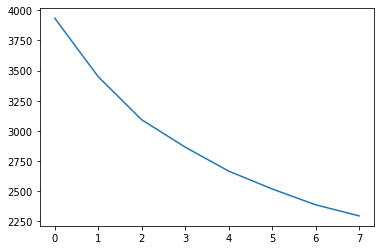

In [49]:
###### print within cluster sum of squared ######
plt.plot(wcss_)
plt.show()

Agglomerative Clustering Use for this dataset prior to Using PCA


In [50]:
for n_cluster_ in range(2, 10):
  AgglomerativeClustering_ = AgglomerativeClustering(n_clusters = n_cluster_)
  AgglomerativeClustering_.fit_predict(new_df)
  print(f"cluster {n_cluster_} score is = {silhouette_score(new_df.values, AgglomerativeClustering_.labels_)}")

cluster 2 score is = 0.15257035486735368
cluster 3 score is = 0.20684275642337957
cluster 4 score is = 0.23978706991039422
cluster 5 score is = 0.21294551878908397
cluster 6 score is = 0.2113135064825333
cluster 7 score is = 0.21383573949243853
cluster 8 score is = 0.2289491074859303
cluster 9 score is = 0.23758744507149013


Finding Feature Imporatnce Using Pearson Correaltion Technique

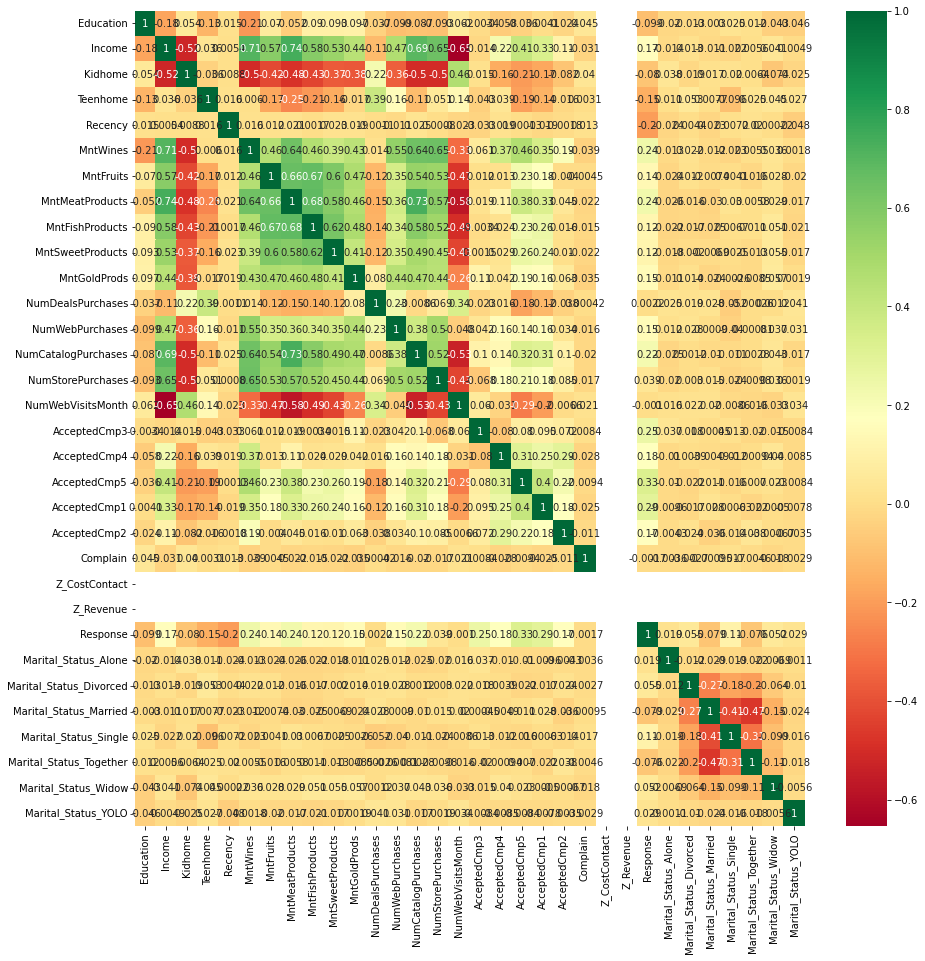

In [51]:
###### Check the correlation matrix ######
plt.figure(figsize = (15, 15))
sns.heatmap(new_df.iloc[:].corr(), annot = True, cmap='RdYlGn')

In [52]:
####### Using Pearson Correaltion Technique to find out the feature importance #######
def correlation(dataset, threshold_):
    col_corr_ = set()
    corr_matrix_ = dataset.corr()
    ###### Run a Loop ######
    for i in range(len(corr_matrix_.columns)):
        for j in range(i):
            if abs(corr_matrix_.iloc[i, j] > threshold_):
                colname_ = corr_matrix_.columns[i]
                col_corr_.add(colname_)
    return col_corr_

In [53]:
pearson_ = correlation(new_df, 0.70)
###### Delete those columns from the dataset which wehave gotten from the pearsin correlation technique ######
new_df.drop(list(pearson_), axis = 1, inplace = True)
###### prin the dataset #######
new_df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Z_CostContact,Z_Revenue,Response,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.5,0.483689,0.0,0.0,0.585859,1.000000,1.000000,0.334601,0.695652,0.200000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.5,0.382557,0.5,0.5,0.383838,0.012346,0.016598,0.003802,0.047431,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.5,0.599234,0.0,0.0,0.262626,0.604938,0.921162,0.079848,0.332016,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.5,0.213650,0.5,0.0,0.262626,0.049383,0.082988,0.011407,0.039526,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.485018,0.5,0.0,0.949495,0.530864,0.381743,0.102662,0.118577,0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Using PCA - Principal Component Analysis for Feature Extraction

In [54]:
PCA_ = PCA()
PCA_.fit_transform(new_df.values)

array([[ 1.14748619e+00, -2.08131032e-01,  8.66752545e-01, ...,
        -2.04418281e-03, -1.97814122e-17, -6.12659583e-17],
       [-4.97374802e-01, -4.85282569e-01,  7.94192899e-01, ...,
         9.74282488e-05, -2.02190259e-17, -2.70780782e-17],
       [ 7.41313881e-01, -4.82425009e-01, -6.65347324e-01, ...,
        -7.08302070e-04, -5.82744504e-17,  2.84772204e-17],
       ...,
       [ 4.04108399e-01, -1.07423722e-01,  4.32693495e-02, ...,
         4.94869902e-04, -2.40283616e-19, -4.66268337e-19],
       [ 5.27712683e-01, -5.16496884e-01, -6.77670390e-01, ...,
        -4.28754048e-04,  4.07153363e-20,  3.54429536e-18],
       [-4.63874087e-01,  5.86374926e-01,  1.10396975e-01, ...,
         4.55146830e-04,  6.82598378e-19,  2.98743212e-18]])

In [55]:
np.cumsum(PCA_.explained_variance_ratio_)

array([0.17965082, 0.3475234 , 0.470362  , 0.54951068, 0.61427676,
       0.66572138, 0.71186172, 0.75314982, 0.78704377, 0.81571242,
       0.84037958, 0.86389593, 0.88620846, 0.90723066, 0.92758443,
       0.94461452, 0.95930973, 0.97005936, 0.97667078, 0.9825305 ,
       0.98739474, 0.99212853, 0.99634281, 0.99854217, 0.99942468,
       0.99993775, 1.        , 1.        , 1.        ])

In [56]:
####### For KMeans Clustering ##########
PCA_ = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ,13, 14, 15, 16, 17, 18, 19, 20]
for pca_ in PCA_:
  print(f"##### PCA {pca_} #####\n")
  PCA_ = PCA(n_components = pca_)
  PCA_dataset_ = PCA_.fit_transform(new_df.values)
  for n_cluster_ in range(2, 10):
    KMeans_ = KMeans(n_clusters = n_cluster_)
    KMeans_.fit_predict(PCA_dataset_)
    print(f"cluster {n_cluster_}, score is = {silhouette_score(PCA_dataset_, KMeans_.labels_)}")

##### PCA 2 #####

cluster 2, score is = 0.49791836536855366
cluster 3, score is = 0.5510400939550958
cluster 4, score is = 0.6092643528899205
cluster 5, score is = 0.5598277824125694
cluster 6, score is = 0.5436720741641418
cluster 7, score is = 0.4911298207595879
cluster 8, score is = 0.49277764688347525
cluster 9, score is = 0.4723269446079901
##### PCA 3 #####

cluster 2, score is = 0.38587217360686754
cluster 3, score is = 0.48242668034072245
cluster 4, score is = 0.5014725048035974
cluster 5, score is = 0.5402871948774584
cluster 6, score is = 0.5718457960085341
cluster 7, score is = 0.5847877208364805
cluster 8, score is = 0.5673207900022671
cluster 9, score is = 0.5714431770894419
##### PCA 4 #####

cluster 2, score is = 0.33406823119607676
cluster 3, score is = 0.4168784046404765
cluster 4, score is = 0.4271119364278997
cluster 5, score is = 0.44624828335851596
cluster 6, score is = 0.4629517987319874
cluster 7, score is = 0.4774833320358536
cluster 8, score is = 0.48379423367

In [57]:
PCA_ = [5, 6, 7, 8, 9, 10, 11, 12 ,13, 14, 15, 16, 17, 18, 19, 20]
for pca_ in PCA_:
  print(f"##### PCA {pca_} #####\n")
  PCA_ = PCA(n_components = pca_)
  PCA_dataset_ = PCA_.fit_transform(new_df.values)
  for n_cluster_ in range(2, 10):
    KMeans_ = AgglomerativeClustering(n_clusters = n_cluster_)
    KMeans_.fit_predict(PCA_dataset_)
    print(f"cluster {n_cluster_}, score is = {silhouette_score(PCA_dataset_, KMeans_.labels_)}")

##### PCA 5 #####

cluster 2, score is = 0.30897568198059927
cluster 3, score is = 0.41776825558808195
cluster 4, score is = 0.4639392165333614
cluster 5, score is = 0.445660729524772
cluster 6, score is = 0.4433525883119939
cluster 7, score is = 0.4471799076654142
cluster 8, score is = 0.45959412529993465
cluster 9, score is = 0.47647836907474
##### PCA 6 #####

cluster 2, score is = 0.277642160405814
cluster 3, score is = 0.37518878514069937
cluster 4, score is = 0.41653842552470416
cluster 5, score is = 0.39296009295576634
cluster 6, score is = 0.3873309833811531
cluster 7, score is = 0.3884843527351669
cluster 8, score is = 0.3970840737538788
cluster 9, score is = 0.4028851042021405
##### PCA 7 #####

cluster 2, score is = 0.2544004060470706
cluster 3, score is = 0.3413548564653309
cluster 4, score is = 0.37567222425233227
cluster 5, score is = 0.34898488574455505
cluster 6, score is = 0.3476796236432142
cluster 7, score is = 0.35423333877656066
cluster 8, score is = 0.363025948921

In [58]:
###### We will take PCA 14 and Do the Agglomerative Clustering #######
PCA_ = PCA(n_components = 14)
X = PCA_.fit_transform(new_df.values)
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.147486,-0.208131,0.866753,0.071409,-0.252328,-0.451136,-0.110454,0.181786,-0.110151,-0.625295,-0.099500,-0.193268,0.006334,-0.024487
1,-0.497375,-0.485283,0.794193,-0.226054,-0.166596,0.091262,-0.101188,-0.095701,0.106074,0.051306,-0.193948,0.135912,0.092811,-0.042528
2,0.741314,-0.482425,-0.665347,-0.249366,-0.196524,-0.274924,-0.092353,-0.362111,-0.041520,0.025306,-0.056388,-0.098748,-0.068958,0.081079
3,-0.429947,-0.717839,-0.526832,0.114318,-0.254801,-0.284476,0.058240,-0.272875,0.089284,0.022589,0.054360,0.041451,-0.069785,0.022721
4,-0.141044,0.684268,-0.118426,-0.227521,-0.101001,-0.034907,0.350265,0.094830,-0.527635,-0.255330,0.021263,0.209302,-0.253046,0.094814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.305346,0.776261,-0.183372,-0.307285,0.043525,-0.041446,-0.333593,0.294977,0.286682,-0.068967,0.173365,0.015442,0.081983,-0.112024
2236,-0.428608,-0.696479,-0.545021,0.332476,-0.167765,0.303026,0.126106,0.064225,-0.119166,0.009732,-0.291094,1.058144,0.154828,0.192360
2237,0.404108,-0.107424,0.043269,-0.091763,0.966626,0.354280,0.727480,-0.172775,0.217537,-0.093189,-0.095075,-0.427321,-0.679322,0.070478
2238,0.527713,-0.516497,-0.677670,-0.163584,-0.050418,0.087143,-0.517354,-0.282047,-0.034395,0.107769,-0.009774,0.068781,0.036104,0.015872


In [59]:
####### Agglomerative Clustering ########
AgglomerativeClustering_ = AgglomerativeClustering(n_clusters = 4)
AgglomerativeClustering_.fit_predict(X.values)
y = AgglomerativeClustering_.labels_
print("The score of this = ", silhouette_score(X.values, y))
print(pd.DataFrame(y).value_counts())

The score of this =  0.29115057662098004
0    896
2    562
1    474
3    308
dtype: int64


In [60]:
###### train and test split of this dataset #######
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1568, 14), (672, 14), (1568,), (672,))

In [61]:
from sklearn import metrics
from tensorflow.keras import optimizers
####### Create a sequntial model ########
model = Sequential()
####### Create first hidden layer with 128 neurons ########
model.add(Dense(units = 128, kernel_initializer = HeNormal(), activation = 'relu', input_dim = X.shape[1]))
####### Use Dropout Layer #######
model.add(Dropout(0.5))
####### Create second hidden layer with 32 neurons ########
model.add(Dense(units = 32, kernel_initializer = HeNormal(), activation = 'relu'))

###### Create an ouput layer #######
model.add(Dense(units = 4, activation = 'softmax'))

###### Compile the model and run it #######
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

###### fit the model and store in the history #######
history_ = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 32, verbose = 1)

Epoch 1/100
49/49 [==============================] - 3s 8ms/step - loss: 0.9560 - accuracy: 0.6607 - val_loss: 0.4282 - val_accuracy: 0.9330
Epoch 2/100
49/49 [==============================] - 0s 4ms/step - loss: 0.3322 - accuracy: 0.9356 - val_loss: 0.1340 - val_accuracy: 0.9851
Epoch 3/100
49/49 [==============================] - 0s 3ms/step - loss: 0.1539 - accuracy: 0.9751 - val_loss: 0.0647 - val_accuracy: 0.9866
Epoch 4/100
49/49 [==============================] - 0s 4ms/step - loss: 0.1035 - accuracy: 0.9764 - val_loss: 0.0433 - val_accuracy: 0.9866
Epoch 5/100
49/49 [==============================] - 0s 4ms/step - loss: 0.0760 - accuracy: 0.9783 - val_loss: 0.0318 - val_accuracy: 0.9926
Epoch 6/100
49/49 [==============================] - 0s 4ms/step - loss: 0.0629 - accuracy: 0.9860 - val_loss: 0.0281 - val_accuracy: 0.9926
Epoch 7/100
49/49 [==============================] - 0s 4ms/step - loss: 0.0496 - accuracy: 0.9860 - val_loss: 0.0234 - val_accuracy: 0.9926
Epoch 8/100
4

In [64]:
X = X.iloc[:].values

KFold Cross Validation for this dataset

In [68]:
Kfold_ = KFold(n_splits = 10, shuffle = True, random_state = 42)
count_, accuracy_, recall_, precision_, f1_score_ = 1, [], [], [], []
for train_index_, test_index_ in Kfold_.split(X):
  ##### print the cross validation #####
  print(f"Cross Validation # {count_}\n")
  ##### Split the train and test #####
  X_train, X_test = X[train_index_], X[test_index_]
  y_train, y_test = y[train_index_], y[test_index_]
  ##### model compile and run #####
  model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 300, batch_size = 64, verbose = 1)
  y_pred = model.predict(X_test)
  predicted_ = np.argmax(y_pred, axis = 1)
  ##### append all neccessity #####
  accuracy_.append(accuracy_score(predicted_, y_test))
  precision_.append(precision_score(predicted_, y_test, average = 'micro'))
  recall_.append(recall_score(predicted_, y_test, average = 'micro'))
  f1_score_.append(f1_score(predicted_, y_test, average = 'micro'))
  ##### Increment count by 1 ######

Streaming output truncated to the last 5000 lines.
32/32 [==============================] - 0s 4ms/step - loss: 1.0323e-05 - accuracy: 1.0000 - val_loss: 2.2884e-08 - val_accuracy: 1.0000
Epoch 210/300
32/32 [==============================] - 0s 4ms/step - loss: 1.7739e-05 - accuracy: 1.0000 - val_loss: 2.0223e-08 - val_accuracy: 1.0000
Epoch 211/300
32/32 [==============================] - 0s 5ms/step - loss: 6.5565e-05 - accuracy: 1.0000 - val_loss: 2.4480e-08 - val_accuracy: 1.0000
Epoch 212/300
32/32 [==============================] - 0s 4ms/step - loss: 1.3185e-05 - accuracy: 1.0000 - val_loss: 2.4480e-08 - val_accuracy: 1.0000
Epoch 213/300
32/32 [==============================] - 0s 5ms/step - loss: 2.6910e-05 - accuracy: 1.0000 - val_loss: 2.5545e-08 - val_accuracy: 1.0000
Epoch 214/300
32/32 [==============================] - 0s 4ms/step - loss: 6.8396e-06 - accuracy: 1.0000 - val_loss: 2.4480e-08 - val_accuracy: 1.0000
Epoch 215/300
32/32 [==============================] - 0s

In [71]:
print("The accuracy is = ", np.array(accuracy_).mean())
print("The recall is   = ", np.array(recall_).mean())
print("The precision is= ", np.array(precision_).mean())
print("f1_ score is    = ", np.array(f1_score_).mean())

The accuracy is =  0.9995535714285715
The recall is   =  0.9995535714285715
The precision is=  0.9995535714285715
f1_ score is    =  0.9995535714285715
